In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt 

batch_size = 128
num_classes = 10
epochs = 20

Using TensorFlow backend.


In [2]:

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [4]:

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=True,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2501 - acc: 0.9222 - val_loss: 0.0987 - val_acc: 0.9692
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.1013 - acc: 0.9692 - val_loss: 0.1008 - val_acc: 0.9695
Epoch 3/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.0750 - acc: 0.9775 - val_loss: 0.0809 - val_acc: 0.9752
Epoch 4/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0618 - acc: 0.9818 - val_loss: 0.0765 - val_acc: 0.9774
Epoch 5/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0505 - acc: 0.9849 - val_loss: 0.0816 - val_acc: 0.9785
Epoch 6/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0424 - acc: 0.9873 - val_loss: 0.0803 - val_acc: 0.9790
Epoch 7/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0384 - acc: 0.9886 - val_loss: 0.0872 - val_acc

In [5]:
history

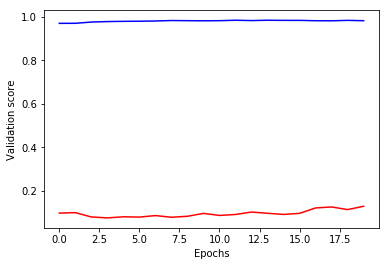

In [6]:
# Create the plot
plt.plot(history.history['val_loss'], 'r', history.history['val_acc'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12996277147308669
Test accuracy: 0.9814


In [10]:
# serialize model to JSON
model_digit_json = model.to_json()
with open("mnist_mlp.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("mnist_mlp.h5")
print("Saved model to disk")

Saved model to disk
